In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pbmc = pd.read_csv("pbmc_poly_a_counts.csv")
skin = pd.read_csv("skin_poly_a_counts.csv")
symbols = pd.read_csv("symbols.csv", index_col = 0)
annotation = pd.read_csv("gencode.v46.primary_assembly.gene_annotation.txt", sep = ' ')

In [6]:
pbmc.sum(axis = 0)

HS_299    16661582
HS_644    16620978
HS_672    16220056
HS_678    18253299
HS_694    16850168
HS_696    19716396
HS_698    18007289
HS_701    17368869
HS_702    16141721
HS_703    15811086
dtype: int64

In [7]:
skin.sum(axis = 0)

HS_299    14255241
HS_644    13612285
HS_672    14857851
HS_678    12499974
HS_694    15426597
HS_696    15875036
HS_698    15395967
HS_701    13876479
HS_702    13724937
HS_703    12254633
dtype: int64

<Axes: title={'center': 'Globin Clear Gene CPM'}, xlabel='log10 CPM', ylabel='Frequency'>

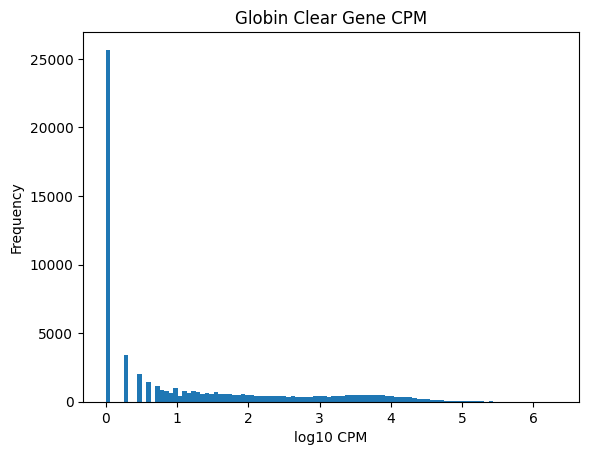

In [121]:
pbmc.sum(axis = 1).apply(lambda x: np.log10(x+1)).plot(kind = "hist", xlabel = "log10 CPM", bins = 100, title = "Globin Clear Gene CPM")

<Axes: title={'center': 'Non-Zero Globin Clear Gene CPM'}, xlabel='log10 CPM', ylabel='Frequency'>

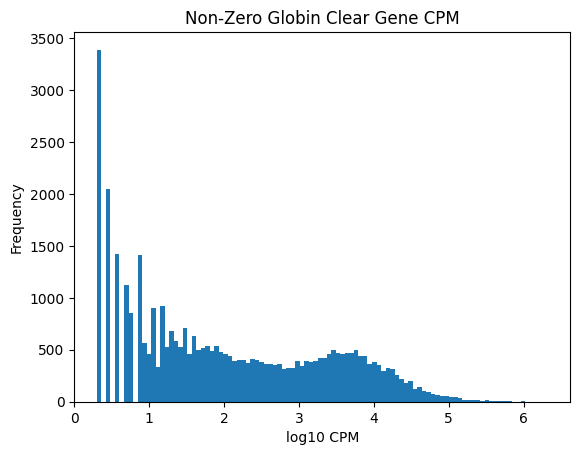

In [122]:
pbmc.sum(axis = 1)[pbmc.sum(axis = 1) > 0].apply(lambda x: np.log10(x+1)).plot(kind = "hist", xlabel = "log10 CPM", bins = 100, title = "Non-Zero Globin Clear Gene CPM")

<Axes: title={'center': 'Non-Globin Clear Gene CPM'}, xlabel='log10 CPM', ylabel='Frequency'>

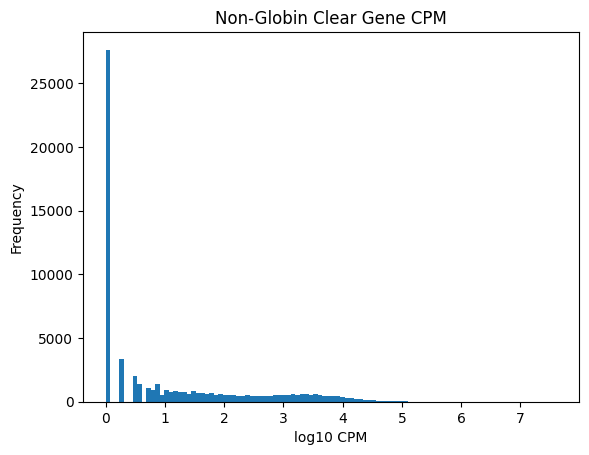

In [123]:
skin.sum(axis = 1).apply(lambda x: np.log10(x+1)).plot(kind = "hist", xlabel = "log10 CPM", bins = 100, title = "Non-Globin Clear Gene CPM")

<Axes: title={'center': 'Non-Zero Non-Globin Clear Gene CPM'}, xlabel='log10 CPM', ylabel='Frequency'>

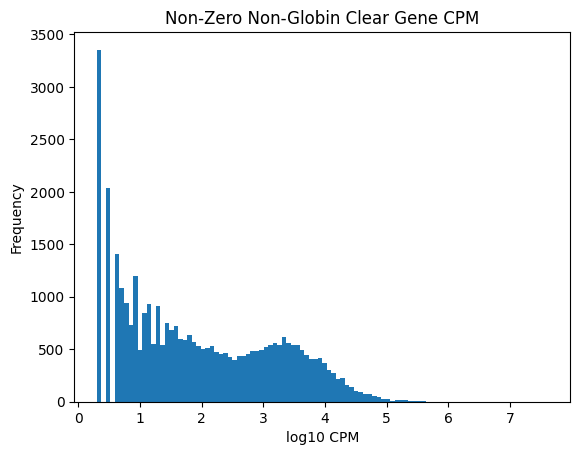

In [124]:
skin.sum(axis = 1)[skin.sum(axis = 1) > 0].apply(lambda x: np.log10(x+1)).plot(kind = "hist", xlabel = "log10 CPM", bins = 100, title = "Non-Zero Non-Globin Clear Gene CPM")

In [113]:
pbmc = pd.read_csv("pbmc_poly_a_counts.csv")
skin = pd.read_csv("skin_poly_a_counts.csv")

skin_nz = (skin > 0).sum(axis = 0)
skin_nz.index = pd.Series(skin_nz.index).apply(lambda x: x+"_ng")
non_zero_genes = pd.DataFrame(pd.concat([(pbmc > 0).sum(axis = 0), skin_nz]), columns = ["detected_genes"])

non_zero_genes["GlobinClear"] = ~non_zero_genes.index.str.endswith("ng")
non_zero_genes["sample_name"] = non_zero_genes.index.str.slice(0,6)

In [117]:
non_zero_genes

,detected_genes,GlobinClear,sample_name
HS_299,26369,True,HS_299
HS_644,24746,True,HS_644
HS_672,26973,True,HS_672
HS_678,23853,True,HS_678
HS_694,26058,True,HS_694
HS_696,26539,True,HS_696
HS_698,24336,True,HS_698
HS_701,27521,True,HS_701
HS_702,27362,True,HS_702
HS_703,27087,True,HS_703


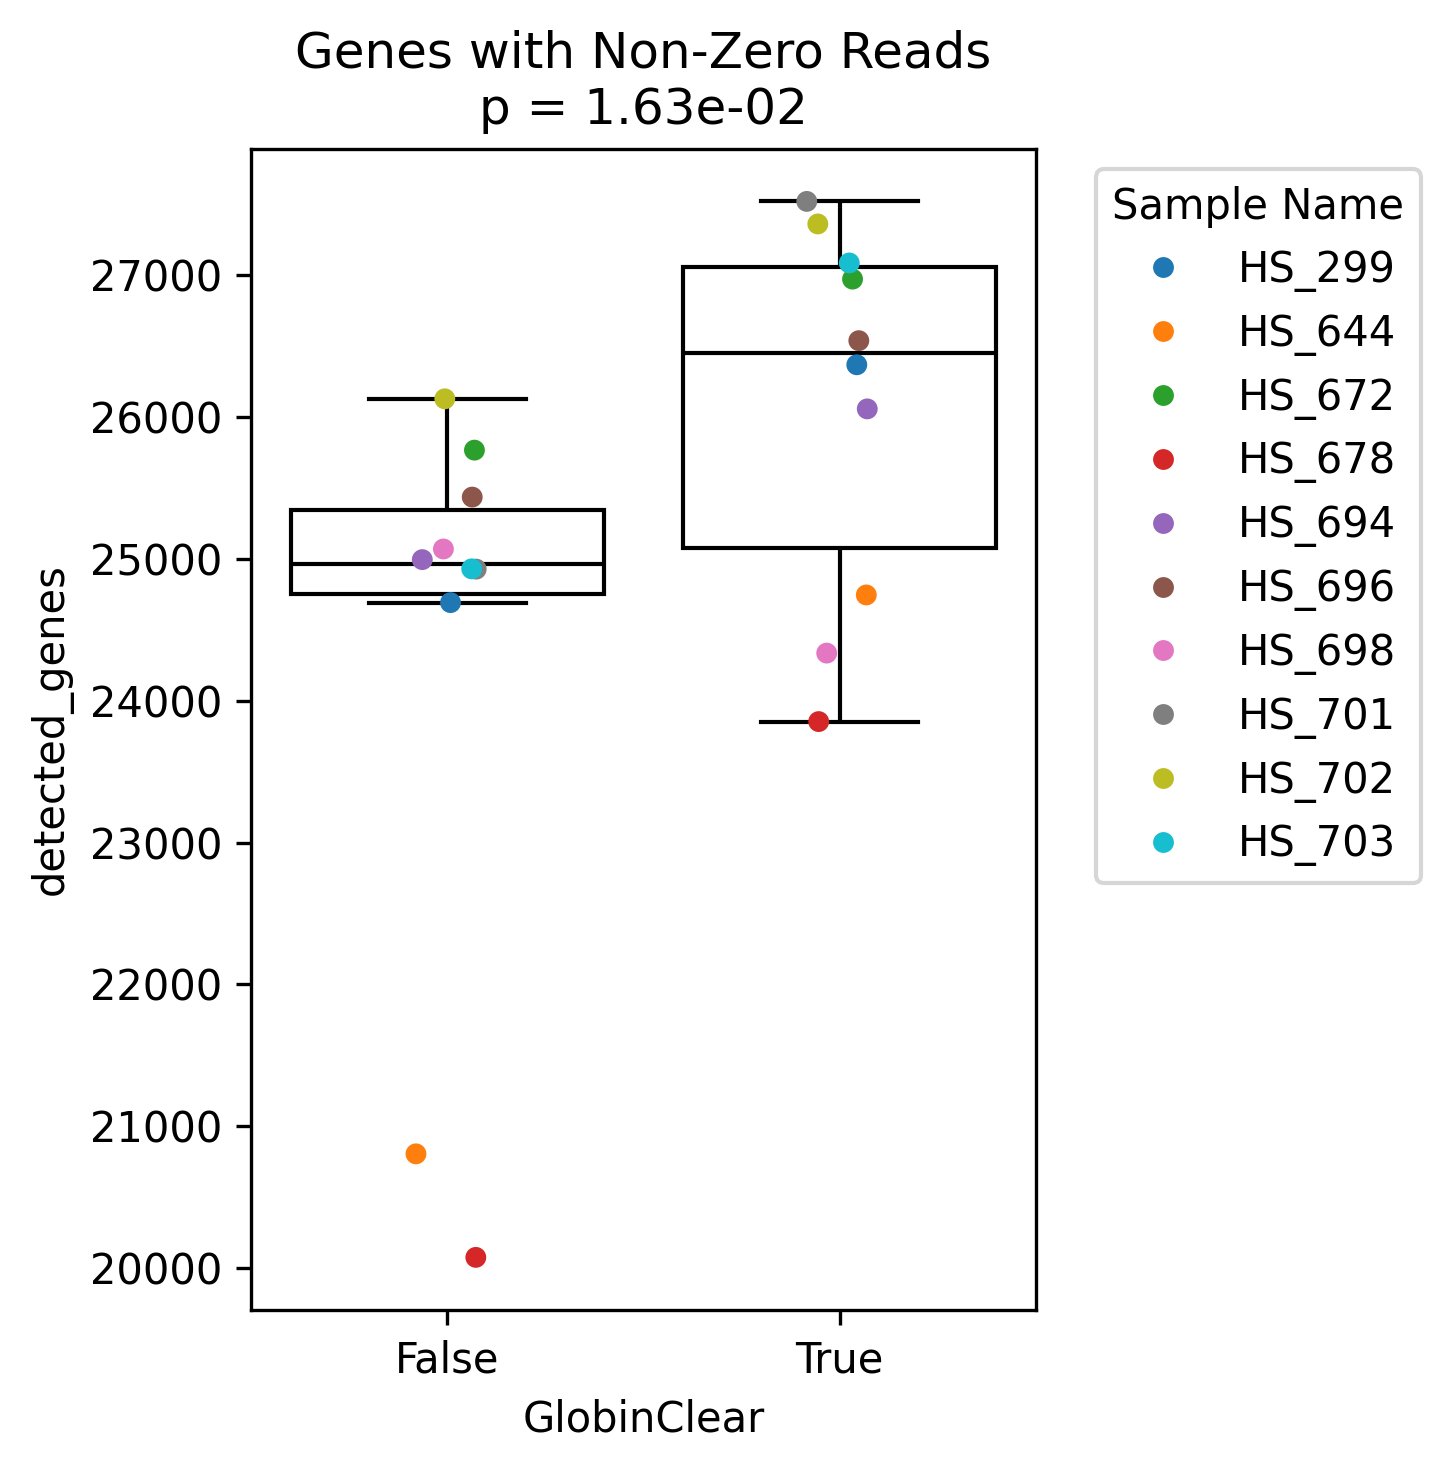

In [119]:
# boxplot number of non-zero genes
from scipy.stats import ttest_ind
from matplotlib.ticker import PercentFormatter
val = "detected_genes"
title = "Genes with Non-Zero Reads"
merged = non_zero_genes

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)  # Set the figure size here

# Create the boxplot
sns.boxplot(x='GlobinClear', y=val, data=merged, ax=ax, color = "white", linecolor = "black", showfliers=False)
sns.stripplot(x='GlobinClear', y=val, data=merged, ax=ax, hue='sample_name', legend = True)


# Perform t-test (or any other test) between the two groups
group_A = merged[merged['GlobinClear']][val]
group_B = merged[~merged['GlobinClear']][val]
t_stat, p_val = ttest_ind(group_A, group_B, alternative = "greater")

# Set the title for the entire figure, not as an attribute of fig

ax.set_title(f'{title}\np = {p_val:.2e}')
plt.legend(title='Sample Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig.savefig("non_zero_reads.png")
#fig.savefig("prior_" + val.split('|')[0] + '.png')

In [3]:
valid_genes = annotation[annotation["Gene_Biotype"].isin(["protein_coding", "lncRNA"])]

In [43]:
valid_genes["ENS_ID"]

0        ENSG00000290825.1
4        ENSG00000243485.5
6        ENSG00000237613.2
8        ENSG00000290826.1
10       ENSG00000186092.7
               ...        
63127    ENSG00000277836.1
63128    ENSG00000278633.1
63135    ENSG00000276017.1
63136    ENSG00000278817.1
63137    ENSG00000277196.4
Name: ENS_ID, Length: 39347, dtype: object

In [25]:
pbmc

,HS_299,HS_644,HS_672,HS_678,HS_694,HS_696,HS_698,HS_701,HS_702,HS_703
ENSG00000290825.1,59,6,2,11,6,2,12,8,7,15
ENSG00000223972.6,0,0,0,0,0,0,0,0,0,0
ENSG00000227232.6,389,542,335,921,484,395,212,407,265,293
ENSG00000278267.1,9,10,16,17,14,6,0,15,11,20
ENSG00000243485.5,0,0,0,0,0,0,6,2,0,1
...,...,...,...,...,...,...,...,...,...,...
ENSG00000276017.1,0,0,0,0,0,0,0,0,0,0
ENSG00000278817.1,5,6,14,5,4,3,0,6,2,8
ENSG00000277196.4,3,0,2,1,5,1,0,2,4,0
ENSG00000278625.1,0,0,0,0,0,0,0,0,1,0


In [44]:
pbmc = pbmc[pbmc.index.isin(valid_genes["ENS_ID"])]
skin = skin[skin.index.isin(valid_genes["ENS_ID"])]

In [6]:
pbmc_non_zero_genes = pbmc[pbmc.T.aggregate(sum) != 0]
skin_non_zero_genes = skin[skin.T.aggregate(sum) != 0]

common_genes = pbmc_non_zero_genes.index.intersection(skin_non_zero_genes.index)

In [45]:
symbols.loc[pd.Series(list(common_genes)).apply(lambda x: x[:x.index('.')]).values].to_csv("common_genes_codinglnc.csv")
len(set(common_genes))

25882

In [7]:
# genes in globin clear not in non-globin clear
globin_clear_unique = set(pbmc_non_zero_genes.index) - set(common_genes)

# genes in non-globin clear in globin clear
non_globin_clear_unique = set(skin_non_zero_genes.index) - set(common_genes)

In [8]:
# number of globin clear unique genes
len(globin_clear_unique)

2311

In [33]:
symbols.loc[pd.Series(list(globin_clear_unique)).apply(lambda x: x[:x.index('.')]).values].to_csv("globin_clear_unique_codinglnc.csv")

In [16]:
pd.Series(list(globin_clear_unique)).to_csv("globin_clear_clnc_ensg.csv")

In [14]:
# number of non-globin clear unique genes
len(non_globin_clear_unique)

1219

In [15]:
symbols.loc[pd.Series(list(non_globin_clear_unique)).apply(lambda x: x[:x.index('.')]).values].to_csv("non_globin_clear_unique_codinglnc.csv")

In [17]:
pd.Series(list(non_globin_clear_unique)).to_csv("non_globin_clear_clnc_ensg.csv")

In [36]:
pbmc_total_counts = pbmc.aggregate(sum)
pbmc_non_zero_genes = pbmc.aggregate(lambda x: sum(x>0))

skin_total_counts = skin.aggregate(sum)
skin_non_zero_genes = skin.aggregate(lambda x: sum(x>0))

In [37]:
df = pd.DataFrame([pbmc_non_zero_genes, skin_non_zero_genes]).T
df.columns = ["Globin Depleted", "No Globin Depletion"]
df["gene change"] = df['Globin Depleted'] - df['No Globin Depletion']

In [39]:
df.to_csv("genes_by_sample.csv")

In [69]:
df['percentage_diff'] = ((df["Globin Depleted"] - df["No Globin Depletion"]) / df["No Globin Depletion"]) * 100
annot_data = np.tile(df['percentage_diff'].values, (2,1))

In [90]:
df['percentage_diff'].describe()

count    10.000000
mean      7.866857
std       6.773664
min      -2.927802
25%       4.422382
50%       5.755284
75%       9.964525
max      18.942562
Name: percentage_diff, dtype: float64

In [70]:
annot_data = annot_data.astype(str)

annot_data[1] = [''] * annot_data[1].shape[0]

annot_data[0] = list(map(lambda x: '+ ' + str(round(float(x), 2)) + '%',list(annot_data[0])))

In [71]:
annot_data

array([['+ 6.79%', '+ 18.94%', '+ 4.68%', '+ 18.82%', '+ 4.25%',
        '+ 4.34%', '+ -2.93%', '+ 10.4%', '+ 4.72%', '+ 8.65%'],
       ['', '', '', '', '', '', '', '', '', '']], dtype='<U32')

Text(0.5, 1.0, '                Mapped Genes')

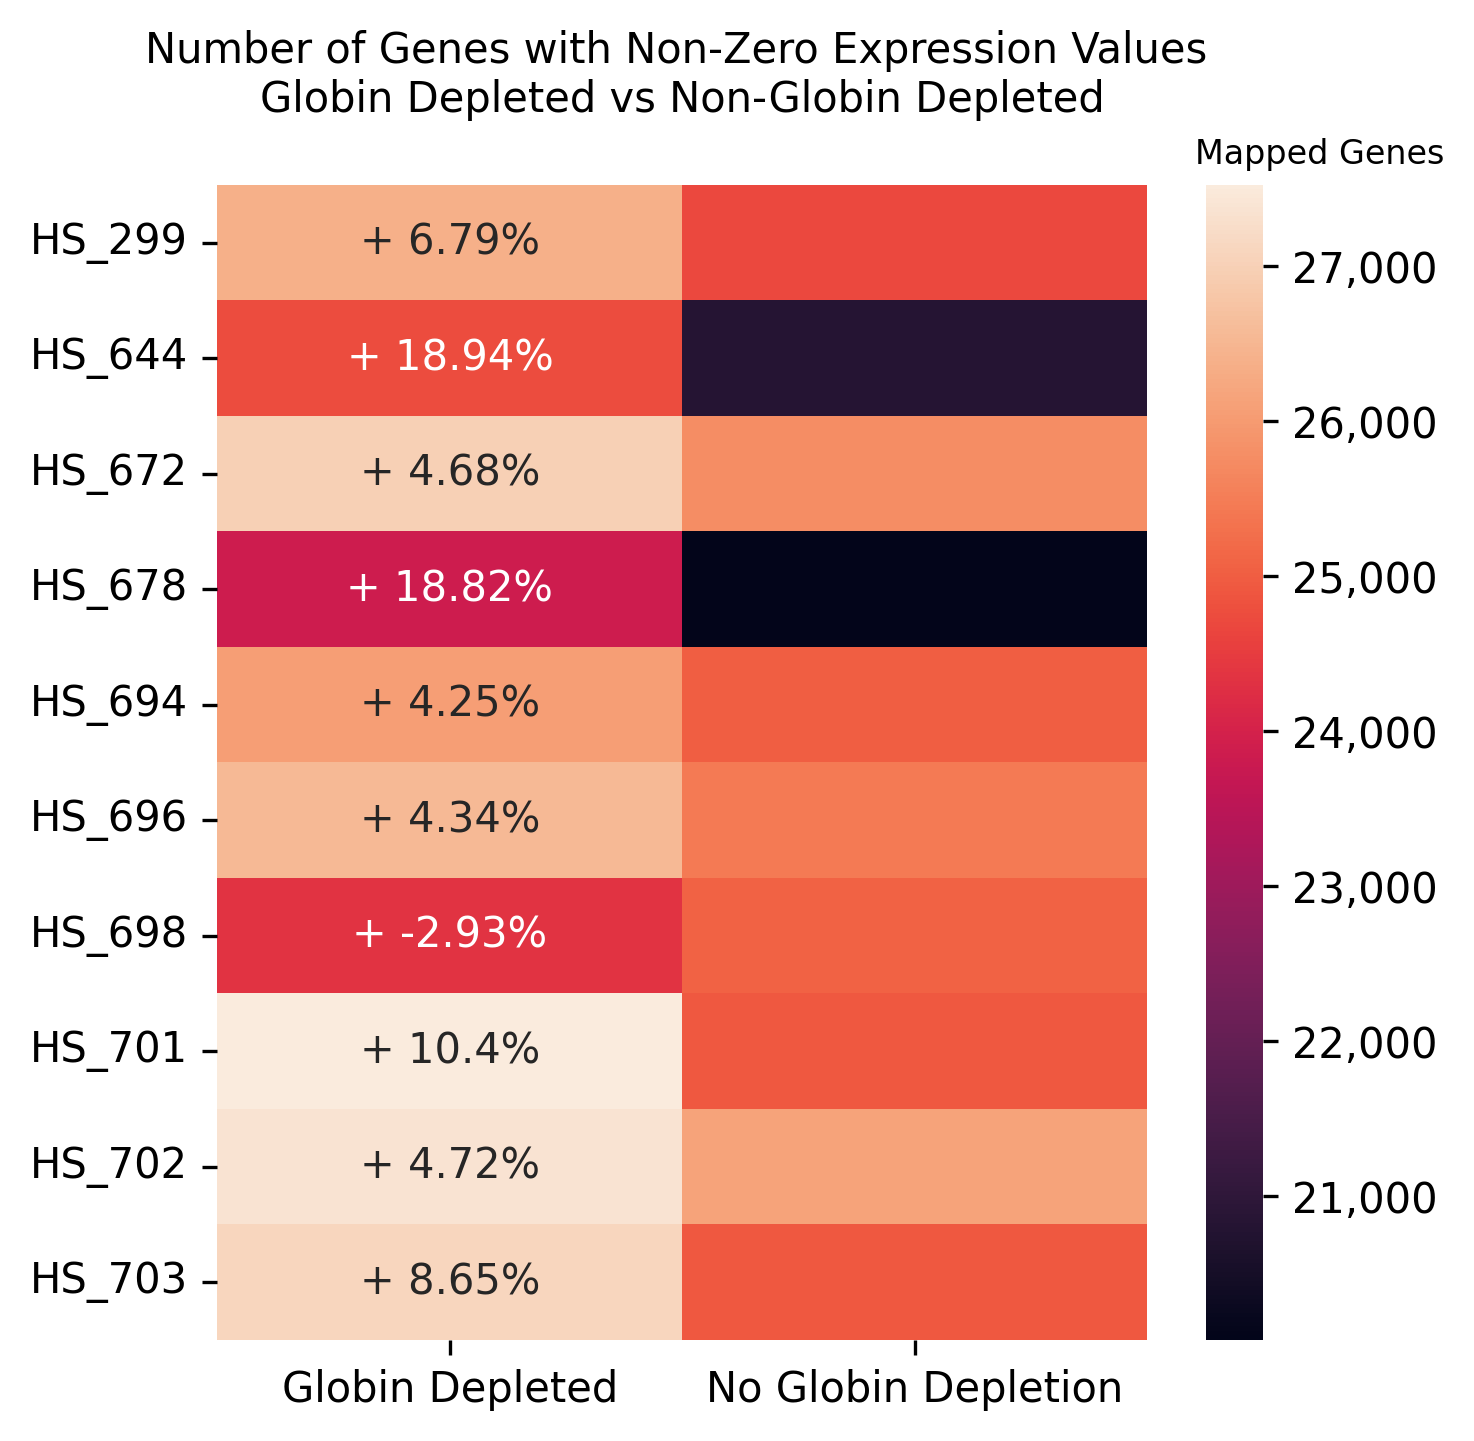

In [89]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (5,5), dpi = 300)
sns.heatmap(df[["Globin Depleted", "No Globin Depletion"]], ax = ax, annot = annot_data.T, fmt = '')
ax.set_title("Number of Genes with Non-Zero Expression Values \nGlobin Depleted vs Non-Globin Depleted\n", fontsize = 10)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
cbar.ax.set_title('                Mapped Genes', fontsize=8, pad=5)

In [10]:
pbmc.columns = pbmc.columns + '_a'

In [14]:
combined = pd.concat([pbmc, skin], axis = 1)

In [15]:
combined.to_csv("combined.csv")

In [3]:
pd.read_csv("globin_clear_unique.csv")

,Unnamed: 0,symbol
0,ENSG00000259013,ENSG00000259013
1,ENSG00000223523,ENSG00000223523
2,ENSG00000260021,ENSG00000260021
3,ENSG00000200142,Y_RNA
4,ENSG00000198765,SYCP1
...,...,...
4377,ENSG00000248951,MTCO2P32
4378,ENSG00000235804,ENSG00000235804
4379,ENSG00000168992,OR7E102P
4380,ENSG00000213653,RPL22P22


In [4]:
pd.read_csv("non_globin_clear_unique.csv")

,Unnamed: 0,symbol
0,ENSG00000289385,ENSG00000289385
1,ENSG00000260990,ENSG00000260990
2,ENSG00000278013,ENSG00000278013
3,ENSG00000139515,PDX1
4,ENSG00000229950,TFAP2A-AS1
...,...,...
2398,ENSG00000187766,KRTAP10-8
2399,ENSG00000228819,AGKP2
2400,ENSG00000225625,ENSG00000225625
2401,ENSG00000227709,SNRNP40P1
